In [1]:
print("Hello world")


Hello world


In [2]:
# importing required libraries

from unstructured.partition.pdf import partition_pdf # partition function for pdf files

from unstructured.documents.elements import Element, Text, Image, FigureCaption
# to parse the elements in the pdf


[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1028)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


In [42]:
# creating a base directory where the pdf file is stored
base_dir = "files"
pdf_file_name = "Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf"

pdf_file_path = f"{base_dir}/{pdf_file_name}"

In [4]:
import os
print(os.getcwd())

/Users/snehalchavan/Desktop/ragProj


In [60]:
from pdf2image import convert_from_path

images = convert_from_path(
    "/Users/snehalchavan/Desktop/ragProj/files/Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf",
    poppler_path="/opt/homebrew/opt/poppler/bin" 

)


print(f"Number of pages: {len(images)}")

Number of pages: 6


In [6]:
!which pdfinfo

/opt/homebrew/bin/pdfinfo


In [7]:
# temporarily adding poppler
import os

# Add Poppler to the PATH for this notebook session
os.environ["PATH"] = "/opt/homebrew/bin:" + os.environ["PATH"]

# Verify
!which pdfinfo

/opt/homebrew/bin/pdfinfo


In [8]:
# creating chunks of the pdf text content
#from unstructured.partition.pdf import partition_pdf

#pdf_path = "/Users/snehalchavan/Desktop/ragProj/files/Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf"


raw_chunks = partition_pdf(
    filename= pdf_file_path,
    strategy= "hi_res",                     # high resolution strategy 
    infer_table_structure= True,            # for parsing a table structure in pdf
    extract_image_block_types= ["Image", "Table", "Figure"],         # parsing the blocks of pdf ( image, text, table, ..)
    extract_image_block_to_payload= True,                       # include the payload of blocks
    chunking_strategy= None,                    # using the bydefaulf chuncking strategy as None to perform basic parsing
    pdf2image_poppler_path="/opt/homebrew/bin"      # adding the poppler path

)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [9]:
print(f"Number of chunks: {len(raw_chunks)}")
print(raw_chunks[:3])  # first 3 chunks

Number of chunks: 98
[<unstructured.documents.elements.Text object at 0x1316e0410>, <unstructured.documents.elements.Header object at 0x1316e0050>, <unstructured.documents.elements.Text object at 0x1316d82f0>]


In [10]:
raw_chunks
# outpts the different elements from the parsed pdf ( Text, header, Title, NarrativeText, ListItem, Image, FigureCaption, Table )

In [11]:
# analysing the chunks
for index, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        print(f"Image at: ", index)        # print the index where images are seen

Image at:  18
Image at:  30
Image at:  34
Image at:  43
Image at:  68


In [12]:
raw_chunks[18].to_dict()        # prints the properties of the image at index 18

{'type': 'Image',
 'element_id': '5f0534d867a5c847f47706257ba7f00b',
 'text': '>>>>>9> BusinessiD INT Expense Report ® Name VARCHAR(50) Location VARCHAR(25) ‘Owner VARCHAR(?2 i —— Garcia UpMall Magsaysay St., Marulas, Valenzuela City RECEIPT Transaction INT Date May 14, 2019 TotalPrice INT Server Precious S. Garcia TransactionDate DATE Type VARCHAR(25 UserID INT Permit VARCHAR(25) ITeMs PRICE Bond Paper Branch VARCHAR(25) ’ Expense “a Purchase Ink Cartridge 2 ued DATE Gi Highlighter 5 Plastic Folder 3 UseriD INT Whiteboard Marker 4 3 FirstName VARCHAR(25) REPORTS ® Purchase LastName VARCHAR(25) ReportiD INT Lotter: ‘Subtotal 2,284.95 Username VARCHAR(15) ReportDate DATE Discount 0.00 Password VARCHAR(12) Reportinfo VARCHAR(50 Tax 274.194 @ Food Change Due 15.05 CrostedBy ID Total 2,284.95 Action VARCHAR(20) PlaniD INT Planinfo VARCHAR(50) >>>>>>>',
 'metadata': {'detection_class_prob': 0.6915606260299683,
  'coordinates': {'points': ((np.float64(166.2365264892578),
     np.float64(213.

In [13]:
raw_chunks[19].to_dict()            # the immediate next element to inage will be FigureCaption

{'type': 'FigureCaption',
 'element_id': 'b66aff8eddd311009a462d60c7d1970c',
 'text': 'Fig 1. Mobile Bookkeeper Block Diagram: Conversion of Rec: eipt Information to Database Data for Expense Report Generation.',
 'metadata': {'detection_class_prob': 0.8395265936851501,
  'coordinates': {'points': ((np.float64(255.96641540527344),
     np.float64(986.284423828125)),
    (np.float64(255.96641540527344), np.float64(1008.4500122070312)),
    (np.float64(1388.1806640625), np.float64(1008.4500122070312)),
    (np.float64(1388.1806640625), np.float64(986.284423828125))),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2339},
  'last_modified': '2024-10-11T22:04:00',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'file_directory': 'files',
  'filename': 'Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf'}}

In [14]:
all_images = []

for indx, chunk in enumerate( raw_chunks):

    if isinstance( chunk, Image):

        # check if the immediate next element of image is a figureCaption
        if indx + 1 < len ( raw_chunks) and isinstance(raw_chunks[indx + 1], FigureCaption):
            caption = raw_chunks[indx + 1].text     # store the caption of image
        else:
            caption = None

        all_images.append({
            "index" : indx,
            "caption": caption if caption else "No caption",        # if the caption exists then store it 
            "image_text" : chunk.text,                              # extract the image text from the chunk
            "base64_image" : chunk.metadata.image_base64,           # extract the image from the chunk in metadata
        })

In [15]:
all_images[1]

{'index': 30,
 'caption': 'No caption',
 'image_text': "15 Home Feed MobileBookkeeper MOST/BOUGHT PRODUCT Starbucks Coffee MobileBookkeeper Login manuelgarciaph@yahoo.com You have bought 15 Starbucks products this week. View expense report. Forgot your password? Sls SM City North Edsa MBG's Home",
 'base64_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAMcBIADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSEl

In [16]:
# function to display a base64 image

import base64

from IPython.display import display, Image as IPImage

def display_image( image_base64):

    image_data = base64.b64decode(image_base64)

    display(IPImage(data= image_data, format= 'png' ) )

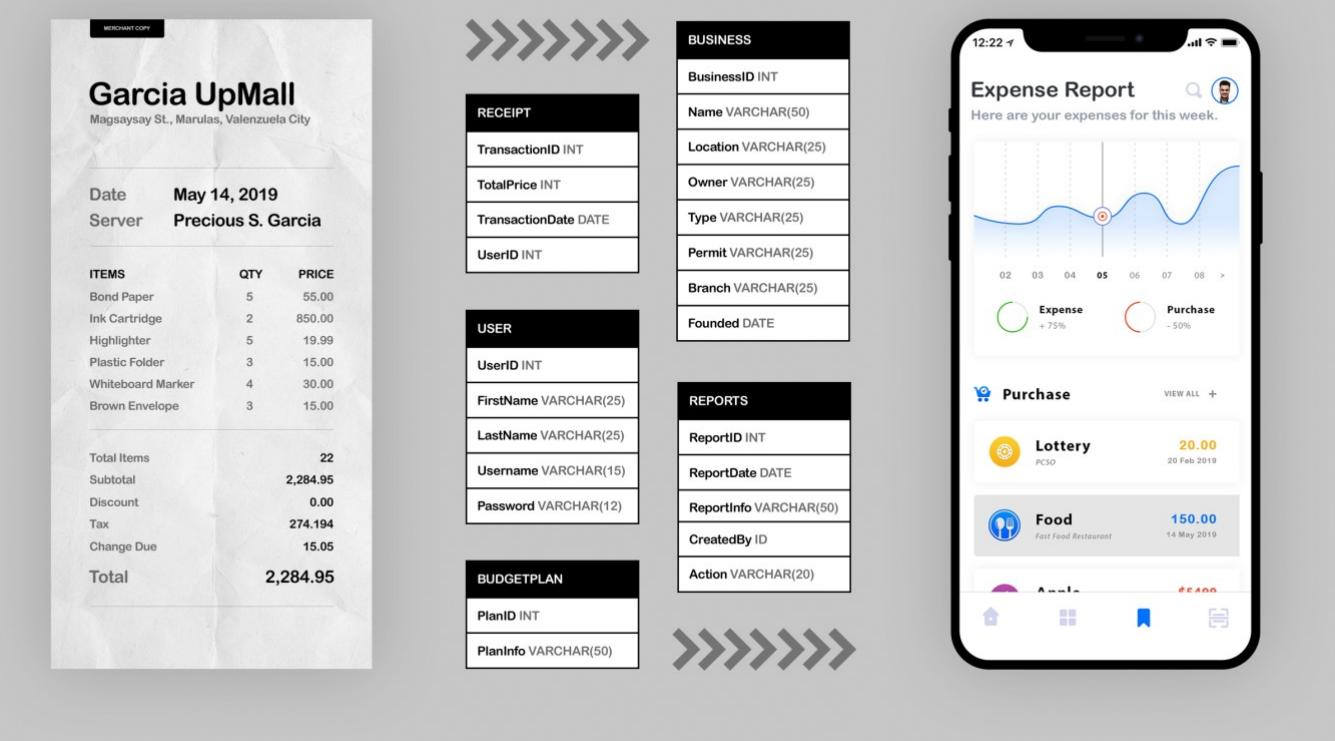

In [17]:
display_image(all_images[0]["base64_image"])

 Index: 18, 
 Caption: Fig 1. Mobile Bookkeeper Block Diagram: Conversion of Rec: eipt Information to Database Data for Expense Report Generation.


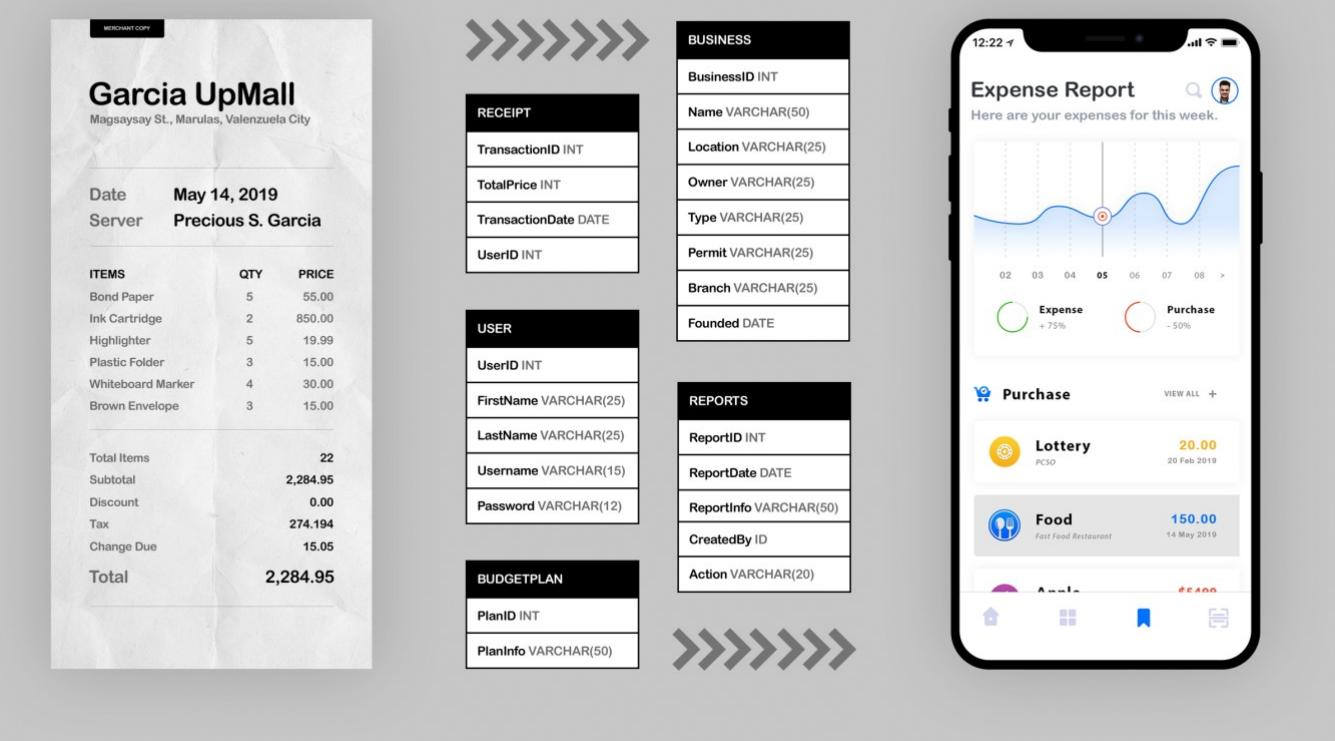

 Index: 30, 
 Caption: No caption


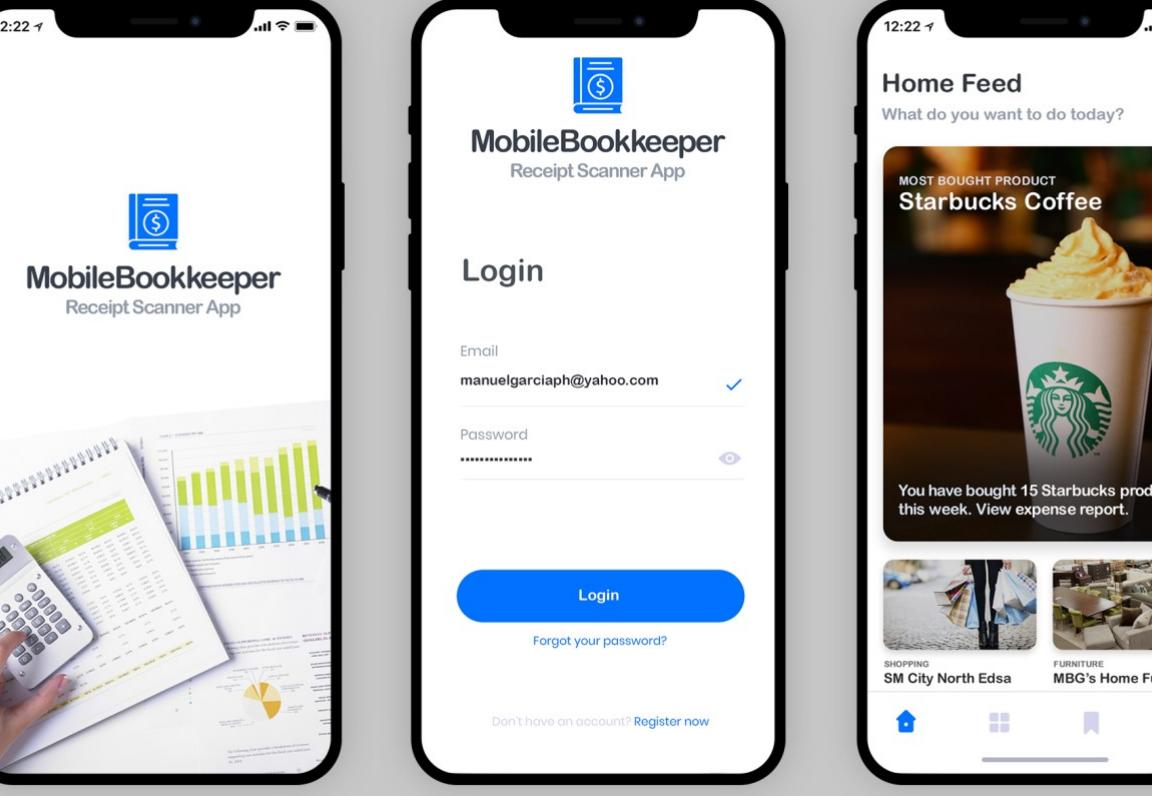

 Index: 34, 
 Caption: Fig 2. Mobile Bookkeeper App Screenshots: (1) Splash — a boot screen to be displayed when the application is loaded, (2) Login — a security layer that requires authentication from users, (3) Home Feed — displays the business locations and products as patronized by users, (4) Expense Report — the summary version of daily, weekly, or monthly expenses grouped into categories, (5) Scan Receipt — conversion of text on paper to digital format using Optical Character Recognition, and (6) Profile Page — displays your most favorite brands and businesses, and your expenses in it.


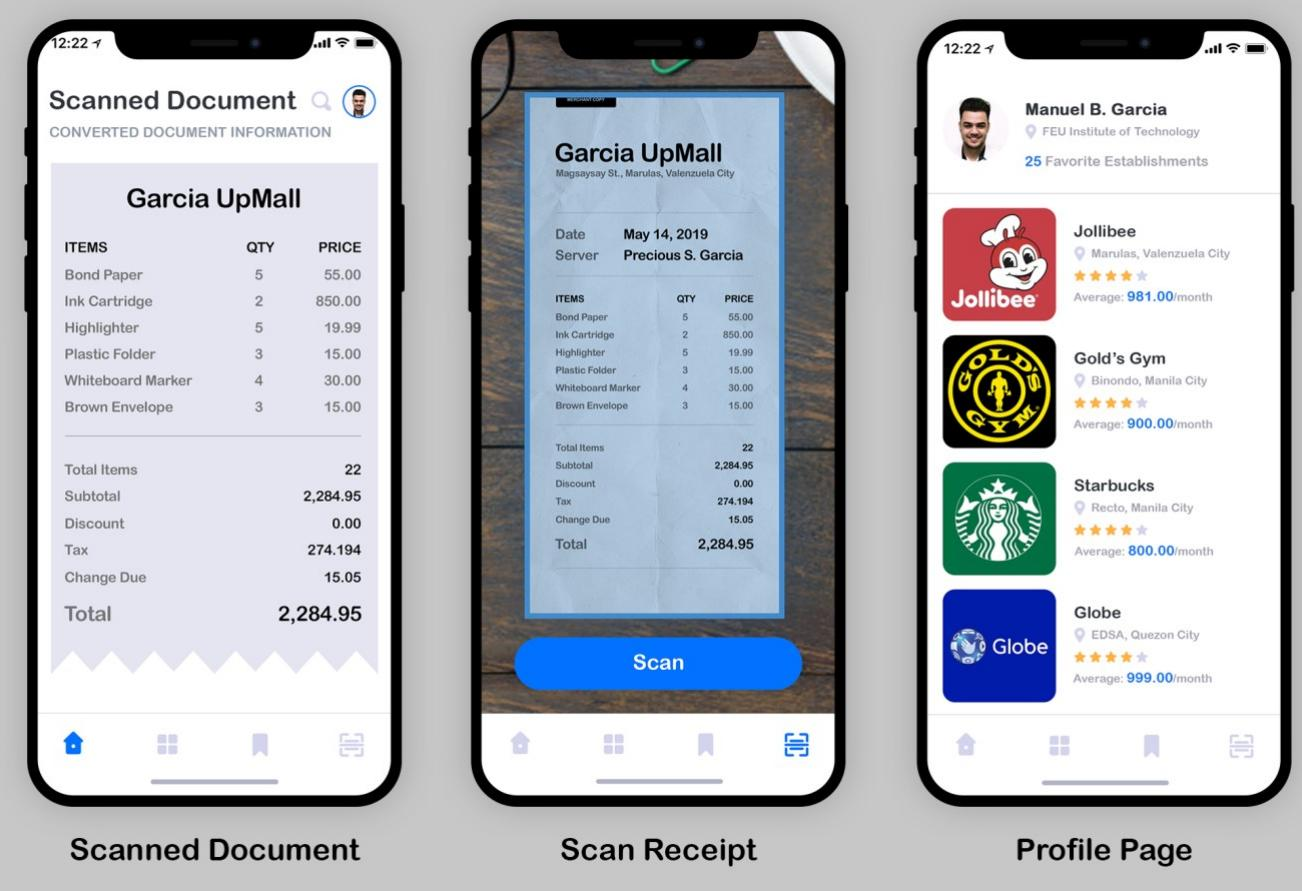

 Index: 43, 
 Caption: Fig 3. Receipt Scanner Feature Block Diagram


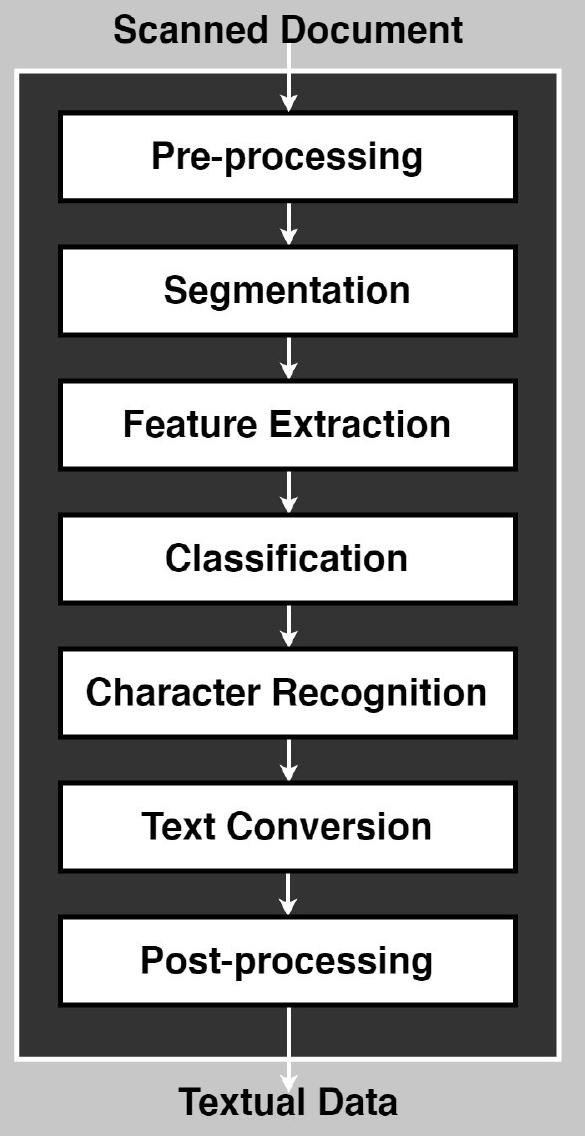

 Index: 68, 
 Caption: Fig 3. Receipt Scanner Feature Block Diagram


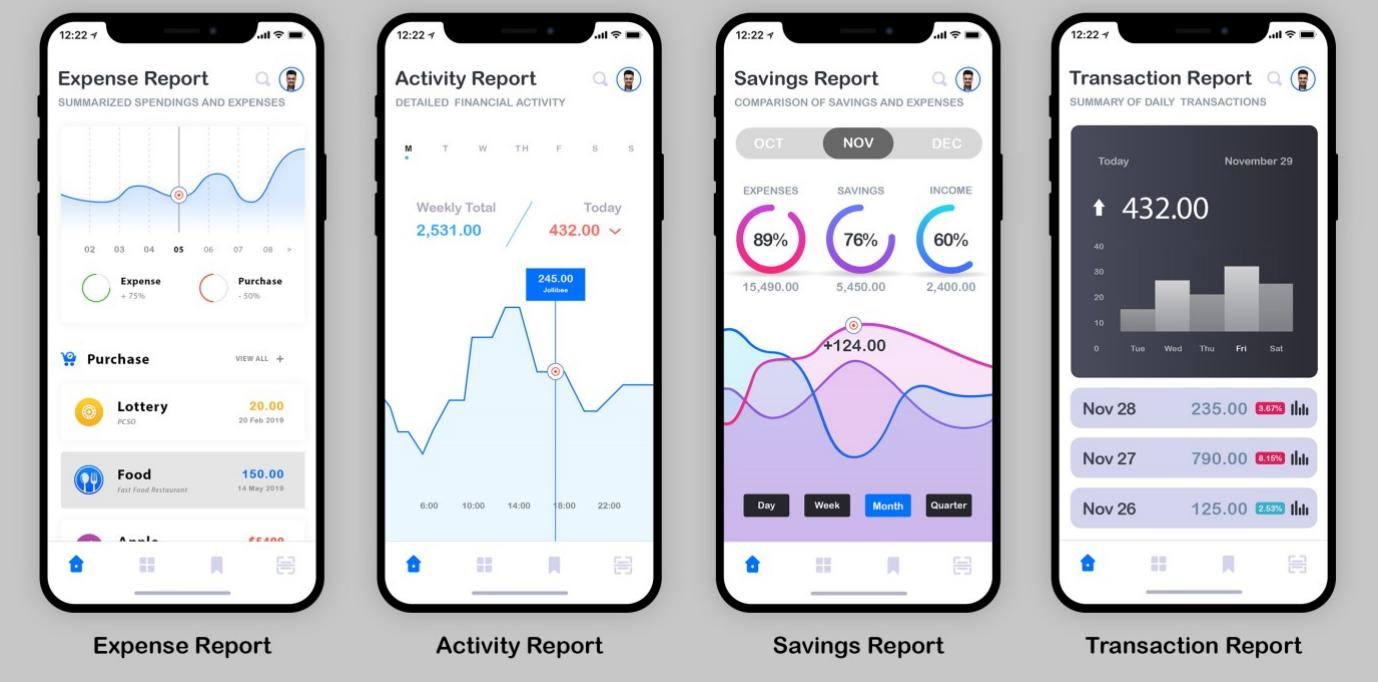

In [18]:
# printing all images in pdf

for image_data in all_images:

    print( f" Index: {image_data['index']}, \n Caption: {image_data['caption']}")

    display_image(image_data["base64_image"])

## image caption generation using third party model ( gemini model )


In [19]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")

if not api_key:
    raise ValueError("GEMINI_API_KEY is not set in env variable")

In [20]:
import google.generativeai as genai

genai.configure(api_key= api_key)

def generate_image_descript(image_data):

    model = genai.GenerativeModel("gemini-2.5-flash")

    # read image ub binary format
    image_binary = base64.b64decode(image_data['base64_image'])

    prompt = (
            f"Describe the image in detail. The caption is : {image_data['caption']}."
            f" The image text is : {image_data['image_text']}"
            f" Directly analyse the image and provide a detailed description without any additional informatiom"
    )
    response = model.generate_content([
        prompt,
        {"mime_type" : "image/png", "data": image_binary
         
        },
    ] )

    return response.text

In [21]:
# printing the models

for m in genai.list_models():
    print(m.name, " | ", getattr(m, "generation_methods", None))

models/embedding-gecko-001  |  None
models/gemini-2.5-pro-preview-03-25  |  None
models/gemini-2.5-flash-preview-05-20  |  None
models/gemini-2.5-flash  |  None
models/gemini-2.5-flash-lite-preview-06-17  |  None
models/gemini-2.5-pro-preview-05-06  |  None
models/gemini-2.5-pro-preview-06-05  |  None
models/gemini-2.5-pro  |  None
models/gemini-2.0-flash-exp  |  None
models/gemini-2.0-flash  |  None
models/gemini-2.0-flash-001  |  None
models/gemini-2.0-flash-exp-image-generation  |  None
models/gemini-2.0-flash-lite-001  |  None
models/gemini-2.0-flash-lite  |  None
models/gemini-2.0-flash-preview-image-generation  |  None
models/gemini-2.0-flash-lite-preview-02-05  |  None
models/gemini-2.0-flash-lite-preview  |  None
models/gemini-2.0-pro-exp  |  None
models/gemini-2.0-pro-exp-02-05  |  None
models/gemini-exp-1206  |  None
models/gemini-2.0-flash-thinking-exp-01-21  |  None
models/gemini-2.0-flash-thinking-exp  |  None
models/gemini-2.0-flash-thinking-exp-1219  |  None
models/gemin

In [22]:
generate_image_descript(all_images[0])

'The image displays a conceptual diagram illustrating the process of converting receipt information into database data for generating expense reports, as hinted by the caption. It is divided into three main sections, arranged horizontally from left to right, depicting a flow of information.\n\n**Left Section: Physical Receipt**\nThe leftmost part of the image shows a detailed representation of a physical merchant receipt, labeled "MERCHANT COPY" in small text at the top left.\n*   **Header:** It prominently features "Garcia UpMall" as the merchant name, with the address "Magsaysay St., Marulas, Valenzuela City" below it.\n*   **Transaction Details:** Below the header, it states "Date May 14, 2019" and "Server Precious S. Garcia".\n*   **Itemized List:** A table lists purchased items with their quantity (QTY) and price:\n    *   Bond Paper: 5 @ 55.00\n    *   Ink Cartridge: 2 @ 850.00\n    *   Highlighter: 5 @ 19.99\n    *   Plastic Folder: 3 @ 15.00\n    *   Whiteboard Marker: 4 @ 30.0

In [23]:
print(generate_image_descript(all_images[0]))

The image displays a three-part visual representation illustrating the process of converting physical receipt information into structured database data and then presenting it within a mobile expense report application.

**Left Section (Receipt):**
On the far left, there is a grayscale depiction of a printed "MERCHANT COPY" receipt from "Garcia UpMall" located at "Magsaysay St., Marulas, Valenzuela City". The receipt shows the date "May 14, 2019" and the server "Precious S. Garcia".
Below this, there's a detailed list of items purchased with their quantities and prices:
*   Bond Paper: QTY 5, PRICE 55.00
*   Ink Cartridge: QTY 2, PRICE 850.00
*   Highlighter: QTY 5, PRICE 19.99
*   Plastic Folder: QTY 3, PRICE 15.00
*   Whiteboard Marker: QTY 4, PRICE 30.00
*   Brown Envelope: QTY 3, PRICE 15.00
The receipt concludes with a summary:
*   Total Items: 22
*   Subtotal: 2,284.95
*   Discount: 0.00
*   Tax: 274.194
*   Change Due: 15.05
*   Total: 2,284.95

**Middle Section (Database Block D

Table Parsing in the pdfs

In [24]:
from unstructured.documents.elements import Table

Table_data = []

for indx, elements in enumerate(raw_chunks):
    
    if isinstance(elements, Table):

        print(elements.to_dict()['metadata'].keys())

        break

dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'text_as_html', 'filetype', 'languages', 'page_number', 'image_base64', 'image_mime_type', 'file_directory', 'filename', 'parent_id'])


In [25]:

for indx, elements in enumerate(raw_chunks):
    
    if isinstance(elements, Table):

        Table_data.append(
            {
                # print the table in html format
                "table_as_html": elements.metadata.text_as_html,
            }
        )

In [26]:
# printing first table in pdf in html format
Table_data[0]

{'table_as_html': '<table><thead><tr><th>sre . Usability Metric</th><th>Mobile App Experts Ge) P</th><th>Finance Professors (n=3)</th><th>Regular App Users 8 (=i)</th><th>Mean (n=30)</th></tr></thead><tbody><tr><td>Data entry time</td><td>3s</td><td>6s</td><td>4s</td><td>4s</td></tr><tr><td>Tasks time</td><td>94s</td><td>143s</td><td>121s</td><td>119s</td></tr><tr><td>Response time</td><td>23</td><td>41</td><td>39</td><td>34s</td></tr><tr><td>Time to learn and use</td><td>12</td><td>64</td><td>43</td><td>40s</td></tr><tr><td>Time to install</td><td>34s</td><td>32s</td><td>31s</td><td>32s</td></tr><tr><td>Number of errors</td><td>0</td><td>2</td><td>1</td><td>3 (total)</td></tr><tr><td>Completion Rate</td><td>100%</td><td>100%</td><td>100%</td><td>100%</td></tr></tbody></table>'}

In [27]:
# displaying the actual table using IPython

from IPython.display import display, HTML

def display_table_as_Html(table_html):
    display(HTML(table_html))


display_table_as_Html(Table_data[0]["table_as_html"])

sre . Usability Metric,Mobile App Experts Ge) P,Finance Professors (n=3),Regular App Users 8 (=i),Mean (n=30)
Data entry time,3s,6s,4s,4s
Tasks time,94s,143s,121s,119s
Response time,23,41,39,34s
Time to learn and use,12,64,43,40s
Time to install,34s,32s,31s,32s
Number of errors,0,2,1,3 (total)
Completion Rate,100%,100%,100%,100%


In [28]:
# Generating table description using gemini model 

# import google.generativeai as genai

# genai.configure(api_key= api_key)

def generate_Table_descript(table_html):

    model = genai.GenerativeModel("gemini-2.5-flash")

    prompt = (
            
            " Analyse the table and provide a detailed description of its contents,"
            "including the structire, key data points, any important trends or insights."
            "Here is the table in HTML format: {table_html}"
            "Directly analyse the table and provide a detailed description without any additional information"
    )

    response = model.generate_content([ prompt ] )

    return response.text

In [29]:
# printing a description of the table
generate_Table_descript(Table_data[0]["table_as_html"])

'The table presents a detailed breakdown of sales performance across three distinct "Market Segments" (A, B, C) for three "Products" (1, 2, 3), along with "Total" figures. The data is structured with market segments and a total column as the primary headers, and various metrics related to product performance listed as row headers.\n\n**Structure:**\nThe table has a clear two-dimensional structure. The first row defines the columns: an empty cell for row labels, followed by "Market Segment A", "Market Segment B", "Market Segment C", and a "Total" column which aggregates data across the segments. The first column (row headers) lists the specific metrics being reported, grouped into four main categories: Sales (Units), Market Share (%), Average Price ($), and Revenue ($).\n\n**Key Data Points and Categories:**\n\n1.  **Sales (Units):**\n    *   This section reports the number of units sold for each product within each segment and their respective totals.\n    *   **Product 2** has the hig

In [32]:
# generate table caption using local model - Ollama

import requests

def generate_Table_des(table_html):

    url = "http://localhost:11434/api/generate"
    headers = {
        "Content-Type": "application/json",
    }

    data = {

        "model" : "llama3",

        "prompt" : (
                
                " Analyse the table and provide a detailed description of its contents,"
                "including the structire, key data points, any important trends or insights."
                f"Here is the table in HTML format: {table_html}"
                "Directly analyse the table and provide a detailed description without any additional information"
        ),

        "max_tokens" : 1000,
        "stream": False,

    }

    response = requests.post(url, headers= headers, json= data )

    response.raise_for_status()

    return response.json()["response"]


In [33]:
generate_Table_des(Table_data[0]["table_as_html"])

'Based on the provided table, here is a detailed analysis of its contents:\n\n**Structure:**\nThe table has 6 rows (headers) and 5 columns. The first column contains the usability metrics, while the subsequent columns represent different groups of users who evaluated these metrics.\n\n**Key Data Points:**\n\n* **Data Entry Time:** The mobile app experts took an average of 3 seconds to complete data entry tasks, whereas finance professors and regular app users took 6 and 4 seconds, respectively. The overall mean was 4 seconds.\n* **Tasks Time:** Mobile app experts spent an average of 94 seconds completing tasks, while finance professors and regular app users took 143 and 121 seconds, respectively. The overall mean was 119 seconds.\n* **Response Time:** The response time for mobile app experts averaged 23 seconds, whereas finance professors and regular app users took 41 and 39 seconds, respectively. The overall mean was 34 seconds.\n* **Time to Learn and Use:** Mobile app experts require

Text parsing 

In [66]:
def generate_semantic_chunks(raw_chunks):
    """
    Create semantic chunks based on title structure.

    Args:
        chunks: List of document elements from unstructured.partition_pdf

    Returns:
        List of semantic chunks
    """
    from unstructured.documents.elements import CompositeElement

    # storing the text chunks 
    processed_chunks = []

    for idx, chunk in enumerate(raw_chunks):
        if isinstance(chunk, CompositeElement):
            chunk_data = {
                # "index": idx,
                # "text": chunk.text,
                "content": chunk.text,
                "content_type": "text",
                "filename": (
                    chunk.metadata.filename if hasattr(chunk, "metadata") else ""
                ),
            }
            processed_chunks.append(chunk_data)

    print(f"Created {len(processed_chunks)} semantic chunks from document")
    return processed_chunks

In [64]:
ls /Users/snehalchavan/Desktop/ragProj/nltk_data/tokenizers/punkt

PY3/               estonian.pickle    malayalam.pickle   spanish.pickle
README             finnish.pickle     norwegian.pickle   swedish.pickle
czech.pickle       french.pickle      polish.pickle      turkish.pickle
danish.pickle      german.pickle      portuguese.pickle
dutch.pickle       greek.pickle       russian.pickle
english.pickle     italian.pickle     slovene.pickle


In [89]:
import nltk
print(nltk.data.path)

['/Users/snehalchavan/nltk_data', '/Users/snehalchavan/Desktop/ragProj/.venv/nltk_data', '/Users/snehalchavan/Desktop/ragProj/.venv/share/nltk_data', '/Users/snehalchavan/Desktop/ragProj/.venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data', '/Users/snehalchavan/Desktop/ragProj/nltk_data']


In [90]:
from nltk.tokenize import sent_tokenize

text = "Hello world. This is a test for punkt."
print(sent_tokenize(text))

['Hello world.', 'This is a test for punkt.']


In [63]:
import nltk
nltk.download('punkt', download_dir='/Users/snehalchavan/Desktop/ragProj/nltk_data')
nltk.download('punkt_tab', download_dir='/Users/snehalchavan/Desktop/ragProj/nltk_data')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


False

In [68]:
nltk.data.path.append('/Users/snehalchavan/Desktop/ragProj/nltk_data')


In [77]:
!pdfinfo


pdfinfo version 25.11.0
Copyright 2005-2025 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011, 2022 Glyph & Cog, LLC
Usage: pdfinfo [options] <PDF-file>
  -f <int>             : first page to convert
  -l <int>             : last page to convert
  -box                 : print the page bounding boxes
  -meta                : print the document metadata (XML)
  -custom              : print both custom and standard metadata
  -js                  : print all JavaScript in the PDF
  -struct              : print the logical document structure (for tagged files)
  -struct-text         : print text contents along with document structure (for tagged files)
  -isodates            : print the dates in ISO-8601 format
  -rawdates            : print the undecoded date strings directly from the PDF file
  -dests               : print all named destinations in the PDF
  -url                 : print all URLs inside PDF objects (does not scan text content)
  -enc <string>    

In [95]:
import nltk
from unstructured.partition.pdf import partition_pdf

# STEP 1: Configure NLTK paths
nltk.data.path.append("/Users/snehalchavan/Desktop/ragProj/nltk_data")

# Verify nltk path
from nltk.tokenize import sent_tokenize
print(sent_tokenize("Hello world. Testing NLTK."))

# STEP 2: Set file and poppler bin path
pdf_file_path = "/Users/snehalchavan/Desktop/ragProj/files/Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf"
poppler_path = "/opt/homebrew/opt/poppler/bin"

# STEP 3: Partition the PDF
raw_chunks_ = partition_pdf(
    filename=pdf_file_path,
    chunking_strategy="basic",  # basic chunking (avoids NLTK unless semantic chunking is used)
    extract_images_in_pdf=False,
    pdf_infer_table_structure=False,
    strategy_kwargs={"poppler_path": poppler_path}
)

print(f"Extracted {len(raw_chunks_)} chunks from the PDF.")

['Hello world.', 'Testing NLTK.']


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng[0m

  Searched in:
    - '/Users/snehalchavan/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/.venv/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/.venv/share/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
    - '/Users/snehalchavan/Desktop/ragProj/nltk_data'
**********************************************************************


In [ ]:
#  tokenization without NLTK, punkt

import PyPDF2

pdf_file_path = "/Users/snehalchavan/Desktop/ragProj/files/Mobile_Bookkeeper_Personal_Financial_Management_Application_with_OCR.pdf"

# Read PDF using PyPDF2
def extract_text_from_pdf(filepath):
    with open(filepath, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""  # extract text safely
        return text

# Extract text
pdf_text = extract_text_from_pdf(pdf_file_path)
print("Text extracted successfully!\n")

# Split into chunks of ~500 words (or adjust)
words = pdf_text.split()
chunk_size = 500
chunks = [' '.join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]

# Display chunked result
for i, chunk in enumerate(chunks[:5], start=1):  # show first 3 chunks
    print(f"\n--- Chunk {i} ---\n")
    print(chunk)

Text extracted successfully!


--- Chunk 1 ---

978-1-6654 -2814 -9/21/$31.00 ©2021 IEEE Mobile Bookkeeper: Personal Financial Management Application with Receipt Scanner Using Optical Character Recognition Manuel B. Garcia College of Computer Studies FEU Institute of Technology Manila, Ph ilippines mbgarcia@feutech.edu.ph Julius P. Claour College of Computer Studies FEU Institute of Technology Manila, Philippines jpclaour @feutech.edu.ph Abstract —Personal financial management is undeniably a worthwhile practice to establish a financia l security during a struggling economy and make intelligent monetary decisions regardless of the plethora of spending temptations . Monitoring personal cash flow is part of achieving financial independence, and it is now undemanding to perform because of the available personal budget apps and fina nce tools. Nevertheless, a missing feature of these technology -driven innovation s is the recording, tracking, and monitoring of receipts as well as the gene